# DIAMONDS - KAGGLE COMPETITION

In [1]:
#Importar módulos para trabajar
import pandas as pd
import numpy as np
import researchpy as rp
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#Usando el módulo pandas la función read_csv permite leer el archivo csv usando la ruta dónde se encuentra ubicado.
diamonds=pd.read_csv('./INPUT/train.csv' )
diamonds.head(11)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381
5,5,0.60,Ideal,D,SI1,61.7,56.0,5.39,5.44,3.34,2263
6,6,0.32,Good,E,SI1,63.1,54.0,4.37,4.41,2.77,524
7,7,0.30,Premium,E,VS2,60.0,60.0,4.40,4.36,2.63,844
8,8,0.52,Premium,G,VS2,62.4,56.0,5.19,5.16,3.23,1577
9,9,0.41,Very Good,E,SI1,61.8,60.0,4.74,4.78,2.94,705


In [3]:
diamonds.shape

(40455, 11)

In [4]:
'''Usando la función info se obtienen,cuántas columnas hay que información proporcionan,cuántos datos hay en cada columna,
el tipo de datos,y si existen valores nulos o no. '''

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [5]:
#Se comprueba además si existen valores duplicados.
diamonds.duplicated().sum()

0

In [6]:
#Existen dos tipos de datos en el dataframe,8 de tipo cuantitativo y 3 de tipo categórico.
#Se debe hacer una observación para saber si los datos categóricos están repetidos o no.
diamonds['color'].unique()


array(['F', 'E', 'D', 'H', 'G', 'J', 'I'], dtype=object)

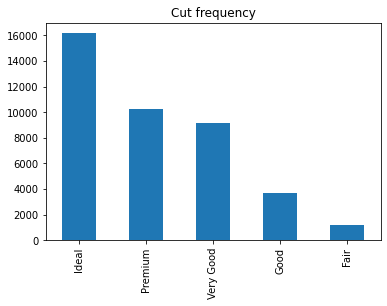

In [7]:
#Tablas de frecuencia
diamonds['cut'].value_counts().plot(kind='bar',title='Cut frequency')


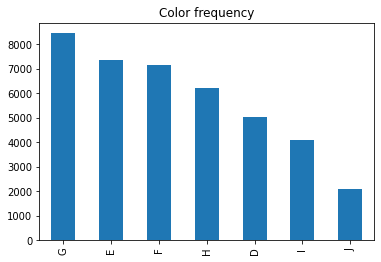

In [8]:
diamonds['color'].value_counts().plot(kind='bar',title='Color frequency')

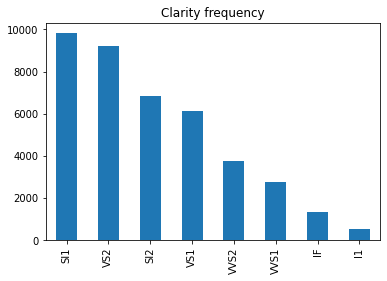

In [9]:
diamonds['clarity'].value_counts().plot(kind='bar',title='Clarity frequency')

In [10]:
#label encoding para poder transformar datos categóricos en datos cuantitativos.
from sklearn import preprocessing
cat_columns=['cut','color','clarity']
for column in cat_columns:
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(diamonds[column])
    diamonds[column]=label_encoder.transform(diamonds[column])
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,4,2,5,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,2,1,2,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,4,0,2,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,3,4,4,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,4,0,2,61.0,63.0,6.10,6.13,3.73,4381


In [11]:
#¿Qué relación existe entre las diferentes columnas?
diamonds.corr()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,0.002653,0.001979,-0.007942,0.002959,0.002349,-0.006281,0.001529,0.001976,0.004030,0.006826
carat,0.002653,1.000000,0.020662,0.289150,-0.212821,0.032379,0.181791,0.974898,0.944513,0.947538,0.922567
cut,0.001979,0.020662,1.000000,0.002828,0.025718,-0.188766,0.149559,0.025532,0.030438,0.005945,0.040733
color,-0.007942,0.289150,0.002828,1.000000,-0.025578,0.046420,0.026387,0.267955,0.259464,0.263969,0.171269
clarity,0.002959,-0.212821,0.025718,-0.025578,1.000000,-0.054104,-0.084703,-0.224169,-0.214578,-0.221445,-0.072106
depth,0.002349,0.032379,-0.188766,0.046420,-0.054104,1.000000,-0.297164,-0.020876,-0.025105,0.099375,-0.005105
table,-0.006281,0.181791,0.149559,0.026387,-0.084703,-0.297164,1.000000,0.194763,0.181585,0.149242,0.129777
x,0.001529,0.974898,0.025532,0.267955,-0.224169,-0.020876,0.194763,1.000000,0.967114,0.965114,0.884089
y,0.001976,0.944513,0.030438,0.259464,-0.214578,-0.025105,0.181585,0.967114,1.000000,0.940678,0.858536
z,0.004030,0.947538,0.005945,0.263969,-0.221445,0.099375,0.149242,0.965114,0.940678,1.000000,0.855923


In [12]:
rp.summary_cont(diamonds[['cut', 'carat','color','clarity']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cut,40455.0,2.556569,1.027918,0.005111,2.546552,2.566586
1,carat,40455.0,0.797150,0.472872,0.002351,0.792542,0.801758
2,color,40455.0,2.598294,1.698944,0.008447,2.581738,2.614850
3,clarity,40455.0,3.839748,1.722592,0.008564,3.822961,3.856534


In [13]:
diamonds.drop(columns=["depth","x","z",'y','table']).head(11)

,id,carat,cut,color,clarity,price
0,0,0.30,4,2,5,605
1,1,0.34,2,1,2,565
2,2,0.40,4,0,2,720
3,3,0.40,3,4,4,793
4,4,0.90,4,0,2,4381
5,5,0.60,2,0,2,2263
6,6,0.32,1,1,2,524
7,7,0.30,3,1,5,844
8,8,0.52,3,3,5,1577
9,9,0.41,4,1,2,705


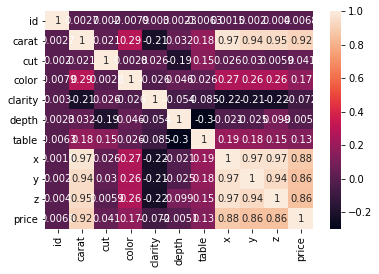

In [14]:
import seaborn as sns

sns.heatmap(diamonds.corr(),annot=True)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC

In [41]:
from sklearn.model_selection import train_test_split
y = diamonds["price"]
X = diamonds[["carat", "cut", "color", "clarity",]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)


In [ ]:
models = {
    "KN":KNeighborsRegressor(),
    "SVC":SVC(),
    "Lasso":LassoCV()
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)
    print(f"Training finished: {modelName}")

Training model: KN
Training finished: KN
Training model: SVC


In [37]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}

df = pd.DataFrame(d)
df["gt"] = y_test.reset_index(drop=True)
df.head()

,forest,GBR,GBR2,gt
0,2090.887357,2067.074430,2206.544378,2357
1,1895.511639,1875.439208,1672.194784,1944
2,2069.302470,2129.344642,2014.051016,2043
3,1665.611732,1680.901679,1794.493562,1613
4,501.567778,556.811823,659.166723,415


In [38]:
kf = KFold(n_splits=2, shuffle=True, random_state=11)
for k, v in models.items():
    scores = cross_val_score(v, X_train, y_train, scoring='r2', cv=kf, n_jobs=2)
    name = str(v)
    print(f'{name}: Average R-Squared Score:', np.mean(scores))

RandomForestRegressor(n_estimators=300): Average R-Squared Score: 0.9765426714333336
HistGradientBoostingRegressor(): Average R-Squared Score: 0.9801390071783447
GradientBoostingRegressor(): Average R-Squared Score: 0.970758084752193


In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmseKN = sqrt(mean_squared_error(y_test, d['KN']))
rmseSVC = sqrt(mean_squared_error(y_test, d['SVC']))
rmseLasso = sqrt(mean_squared_error(y_test, d['Lasso']))
print(f"KN: {rmseKN}, SVC: {rmseSVC}, Lasso: {rmseLasso}")

forest: 608.6352047101086, GBR: 589.1053482987766, GBR2: 693.949453499564


In [21]:
test_diamonds = pd.read_csv('./INPUT/predict.csv')

In [22]:
test_diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16


In [23]:
cat_columns=['cut','color','clarity']
for column in cat_columns:
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(test_diamonds[column])
    test_diamonds[column]=label_encoder.transform(test_diamonds[column])
test_diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.36,2,5,3,60.8,54.0,8.68,8.57,5.24
1,1,2.04,2,4,3,62.0,56.0,8.18,8.23,5.09
2,2,0.51,2,5,2,61.7,54.0,5.18,5.19,3.20
3,3,0.30,2,5,2,61.3,56.0,4.32,4.33,2.65
4,4,0.96,0,4,5,68.8,56.0,6.11,5.98,4.16


In [24]:
columns = ['depth', 'table', 'x', 'y', 'z']
for col in columns:
    test_diamonds[col] = (test_diamond[col] - np.mean(test_diamond[col])) / np.std(test_diamond[col]) 

test_diamonds.head()

NameError: name 'test_diamond' is not defined

In [ ]:
d1 = {modelName:model.predict(test_diamonds[["carat", "cut", "color", "clarity"]]) for modelName, model in models.items()}

df1 = pd.DataFrame(d1)
df1['id']=test_diamonds['id']
diamonds_new = df1[['id','KN']]
diamonds_new.rename(columns={"KN": "price"}, inplace=True)
diamonds_new.head()

In [ ]:
diamonds_new.head()

In [ ]:
diamonds_new.to_csv('./OUTPUT/diamonds2.csv' )